# Time-Frequency Representation Demonstration
Signals can be completely characterized with equations as a function of time or a function of frequency.  As an example, consider a cosine function,

$x(t) = \cos(2 \pi f_c t).$  

## Time Domain
The following plot shows the time-domian representation of the signal.  Try modifying the carrier freqeuncy of the cosine.  Over the same time interval, a higher-frequency signal will have more periods.


In [1]:
# Imports
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = (9.0, 5.0)

### Step 1: Create Signal

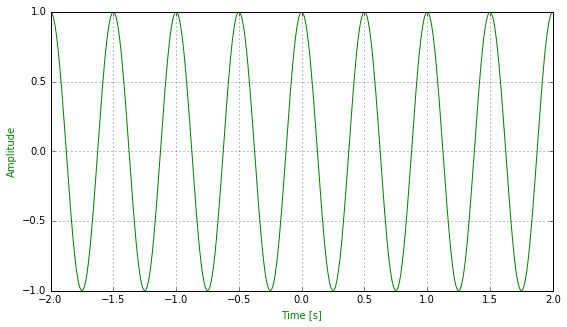

In [2]:
# 2 Hz
f_c = 2
t = np.arange(-2,2,.01)
x = np.cos(2*np.pi*f_c*t)
plt.plot(t,x, color='g');
plt.ylabel('Amplitude', color='g');
plt.xlabel('Time [s]', color='g');
plt.grid(True);

### Step 2: GRC Demo
Let's replicate this plot using GRC.  Find a partner.  Designate one person as the source and the other as the sink.  The source should use the signal source block to generate cosine in the ISM band.  In parallel, the sink should create an oscilliscope sink block to view the cosine in the time domain.  Experiment with the triggers so that you have a nice view of the signal.

### Step 3: Frequency Domain
The _frequency domain_ can mean different things in different contexts, and rigorous difinitions can be quite mathematically involved.  For our purposes we will forego most of the math and simply define the frequency domain signal as the Fourier Transform of the time-domain signal. That is,

$X(f) = FT(x(t),f) = \int_{-\infty}^\infty e^{-j2\pi f t} x(t)dt$  

As an example, substitute $x(t)= \cos(2 \pi f_c t)$.  If we complete the integral, we find that

$X(f) = \frac{1}{2}\delta(f-2\pi f_c)-\frac{1}{2}\delta(f+2\pi f_c)$

Again, we will shy away from a rigourus definition of the delta function.  Suffice it to say that it is only non-zero when its argument is zero.  The following cell plots the _frequency spectrum_ of $x(t)$.  Modifying the center frequency will adjust change the delta functions which will change the freqeuncy spectrum plot.

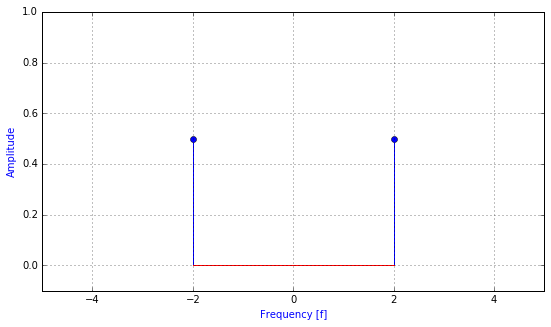

In [3]:
# 2 Hz
f_c = 2
f = [-f_c,f_c]
X = [.5,.5]
plt.stem(f,X, color='b');
plt.ylabel('Amplitude', color='b');
plt.xlabel('Frequency [f]', color='b');
plt.ylim([-.1,1])
plt.xlim([-5,5])
plt.grid(True);

### Step 5: GRC Demo
Again let's replicate this plot using GRC.  The source partner should continue to transmit, while the sink partner switches the osciliscope sink block with the freqeuncy sink block.  Experiment with varying the transmit frequency.


### Step 6: Fourier Transform
In practice, we do not usually know the Fourier transform (FT) pair of a signal a priori.  Instead, we have to apply an FT or IFT to a sample of the signal if we want to transform between domains.  The following is an example of a _forward_ FT.  That is, a transfrom from time to frequency.

/Users/bob/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


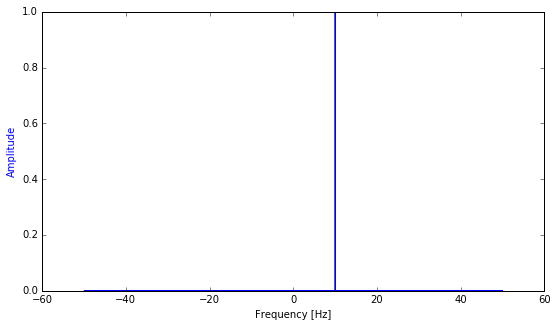

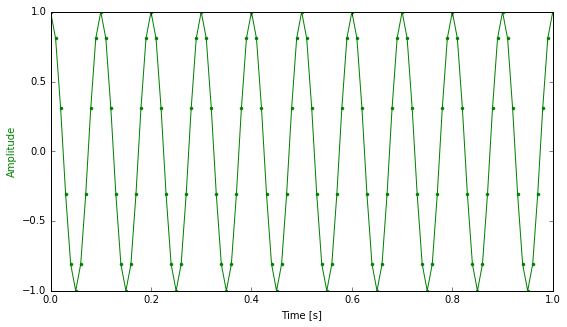

In [5]:
f_c = 10
sample_rate = 100.0

# create time samples
t = np.arange(0,100,1.0/sample_rate)

# create signal values
x = np.cos(2*np.pi*f_c*t)
x = np.exp(2*1j*np.pi*f_c*t)

total_signal_power = sum(abs(x)**2)

# Calculate DFT
spectrum = np.fft.fft(x)

# DFT frequencies
freq = np.fft.fftfreq(x.size)

# plot FFT
plt.figure(1)
plt.plot(freq*sample_rate, abs(spectrum/total_signal_power), 'b');
plt.ylabel('Amplitude', color='b');
plt.xlabel('Frequency [Hz]');

# plot time domain
plt.figure(2)
plt.plot(t, x, 'g', marker='.',);
plt.ylabel('Amplitude', color='g');
plt.xlabel('Time [s]');
plt.xlim([0,1]);


### Step 7: Interactive Version Spectrum

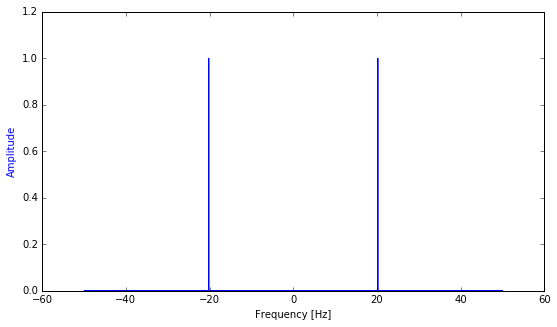

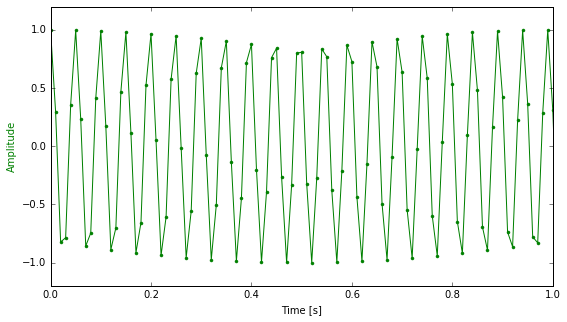

In [6]:
from IPython.html.widgets import interactive
from IPython.display import display

def plot_spectrum(sample_rate = 100, f_c = 10):
    # create time samples
    t = np.arange(0,100,1.0/sample_rate)

    # create signal values
    x = np.cos(2*np.pi*f_c*t)

    total_signal_power = sum(abs(x)**2)

    # Calculate DFT
    spectrum = np.fft.fft(x)

    # DFT frequencies
    freq = np.fft.fftfreq(x.size)

    # plot FFT

    # plot FFT
    plt.figure(1)
    plt.plot(freq*sample_rate, abs(spectrum/total_signal_power), 'b');
    plt.ylabel('Amplitude', color='b');
    plt.xlabel('Frequency [Hz]');
    plt.ylim([0,1.2]);

    # plot time domain
    plt.figure(2)
    plt.plot(t, x, 'g', marker='.',);
    plt.ylabel('Amplitude', color='g');
    plt.xlabel('Time [s]');
    plt.xlim([0,1]);
    plt.ylim([-1.2,1.2]);

interactive(plot_spectrum,sample_rate=(1.0,300.0),f_c=(.3,30.0))

### Step 8: Inverse Fourier Transform
Likewise, we can convert from the frequency domain to the time domain using an inverse FT (IFT).

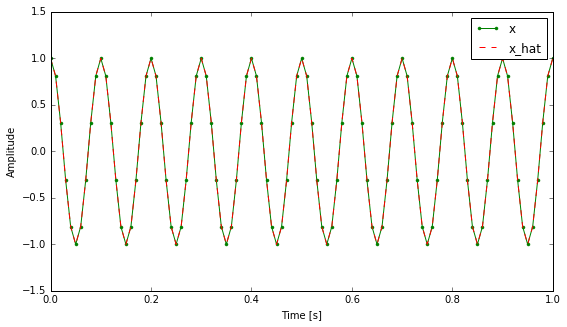

In [7]:
f_c = 10
sample_rate = 100.0

# create time samples
t = np.arange(0,100,1.0/sample_rate)

# create signal values
x = np.cos(2*np.pi*f_c*t)

total_signal_power = sum(abs(x)**2)

# Calculate DFT
spectrum = np.fft.fft(x)

# invert the fft
x_hat = np.fft.ifft(spectrum)

# plot time domain
plt.figure(2)
plt.plot(t, x, 'g', marker='.',label='x');
plt.plot(t, x_hat, 'r--',label='x_hat');
plt.ylabel('Amplitude', color='k');
plt.xlabel('Time [s]');
plt.xlim([0,1]);
plt.legend();


### Step 9: Spectrogram
Most signals have a spectrum that varies with time. Spectrograms of the signals are a way to visualize the time-frequency content.

The example code below is modified from http://matplotlib.org/examples/pylab_examples/specgram_demo.html

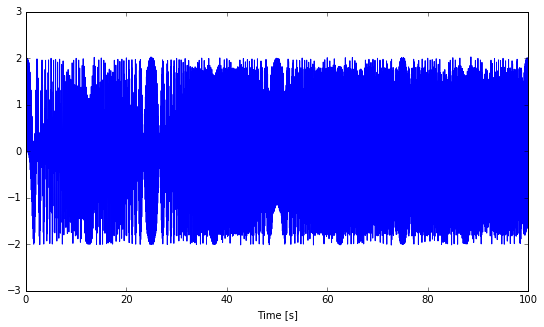

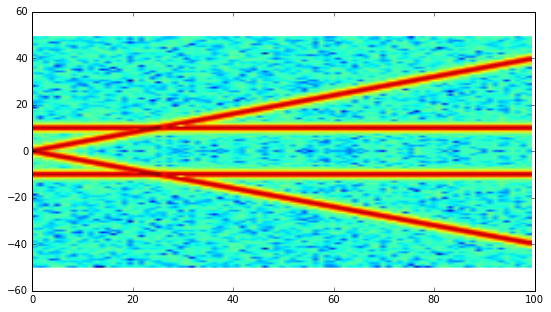

In [14]:
f_c = 10
sample_rate = 100.0

# create time samples
t = np.arange(0,100,1.0/sample_rate)

# create signal values
x_1 = np.cos(2*np.pi*f_c*t)#*0

# higher freqeuncy
# x_2 = np.cos(2*np.pi*2*f_c*t)

# chirp
x_2 = np.cos(2*np.pi*2*f_c/100*t**2)

# impulse
# x_2 = np.where(np.logical_and(t>10, t<10.02), 1.0, 0.0)


# add some noise into the mix
noise = 0.01*np.random.randn(len(t))

x = x_1 + noise + x_2  # the signal
NFFT = 64       # the length of the windowing segments

# Pxx is the segments x freqs array of instantaneous power, freqs is
# the frequency vector, bins are the centers of the time bins in which
# the power is computed, and im is the matplotlib.image.AxesImage
# instance

plt.figure(1)
plt.plot(t, x)
plt.xlabel('Time [s]');
# plt.xlim([0,15]);
plt.figure(2)
Pxx, freqs, bins, im = plt.specgram(x, NFFT=NFFT*2, Fs=sample_rate, noverlap=NFFT/4,sides='twosided')
# plt.xlim([0,15]);

### Step 10: Problem--Interactive Spectrogram
In the python cell below, create code that will make the above two plots interactive.  Use your imagination to specify which variables are adjustable.

#### Inputs
- f_c
- chirp parameters

#### Outputs
- time plot
- spectrum plot


In [ ]:
##########  Insert Code in this cell  ###########
def plot_spec_demo():  # add arguments and default values
    
    # create signals

    # create plots

interactive()  # add arguments and ranges

### Step 11: Bandlimited signal
We saw from the slides that a sinc pulse has a low-pass spectrum.  The cell below illustrates that.

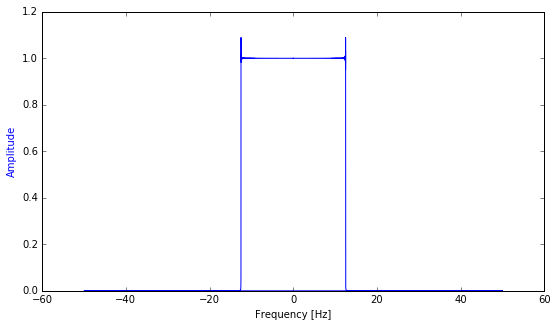

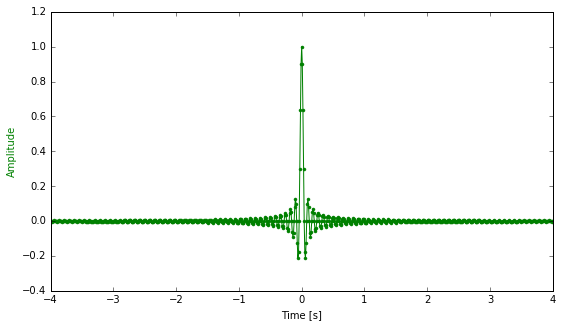

In [15]:
f_c = 25
sample_rate = 100.0

# create time samples
t = np.arange(-100,100,1.0/sample_rate)

# create signal values
x = np.sinc(t*f_c)


total_signal_power = sum(abs(x)**2)

# Calculate DFT
spectrum = np.fft.fft(x)

# DFT frequencies
freq = np.fft.fftfreq(x.size)


# plot FFT
plt.figure(1)
plt.plot(freq*sample_rate, abs(spectrum/total_signal_power), 'b');
plt.ylabel('Amplitude', color='b');
plt.xlabel('Frequency [Hz]');


# plot time domain
plt.figure(2)
plt.plot(t, x, 'g', marker='.');
plt.ylabel('Amplitude', color='g');
plt.xlabel('Time [s]');
plt.xlim([-4,4]);

### Step 12: Square Wave
The following cell demonstrate the spectrum (and therefore the Fourier Series) of a square wave.

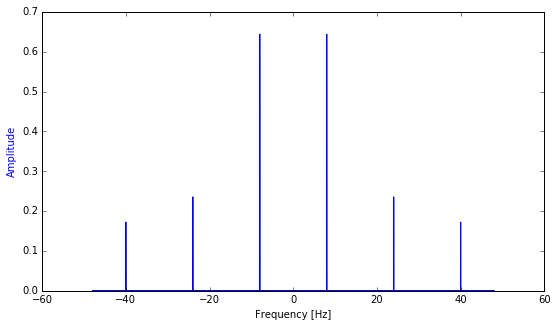

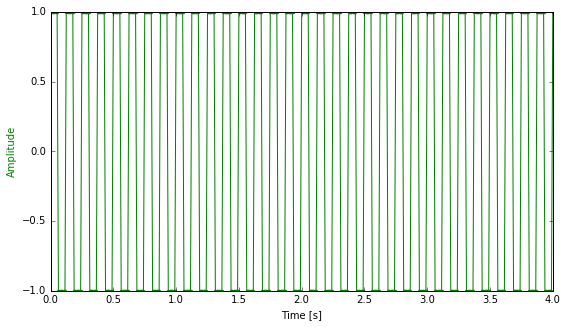

In [16]:
from scipy import signal
f_c = 8
sample_rate = 96.0

# create time samples
t = np.arange(-100,100,1.0/sample_rate)

# create signal values
x = signal.square(2 * np.pi * f_c * t)

total_signal_power = sum(abs(x)**2)

# Calculate DFT
spectrum = np.fft.fft(x)

# DFT frequencies
freq = np.fft.fftfreq(x.size)


# plot FFT
plt.figure(1)
plt.plot(freq*sample_rate, abs(spectrum/total_signal_power), 'b');
plt.ylabel('Amplitude', color='b');
plt.xlabel('Frequency [Hz]');


# plot time domain
plt.figure(2)
plt.plot(t, x, 'g', marker='.');
plt.ylabel('Amplitude', color='g');
plt.xlabel('Time [s]');
plt.xlim([0,4]);

### Step 13: Beat Frequencies
Pull Jupyter code and run `notebooks/ipython/examples/Interactive%20Widgets/Beat%20Frequencies.ipynb`